<a href="https://colab.research.google.com/github/mishiruv/EVA5/blob/master/EVA5S6_Mayank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [1]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

## Data Transformations

We first start with defining our data transformations. We need to think what our data is and how can we augment it to correct represent images which it might not see otherwise. 

Here is the list of all the transformations which come pre-built with PyTorch

1.   Compose
2.   ToTensor
3.   ToPILImage
4. Normalize
5. Resize
6. Scale
7. CenterCrop
8. Pad
9. Lambda
10. RandomApply
11. RandomChoice
12. RandomOrder
13. RandomCrop
14. RandomHorizontalFlip
15. RandomVerticalFlip
16. RandomResizedCrop
17. RandomSizedCrop
18. FiveCrop
19. TenCrop
20. LinearTransformation
21. ColorJitter
22. RandomRotation
23. RandomAffine
24. Grayscale
25. RandomGrayscale
26. RandomPerspective
27. RandomErasing

You can read more about them [here](https://pytorch.org/docs/stable/_modules/torchvision/transforms/transforms.html)

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
#Train Phase transformations
train_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.RandomRotation((-10.0, 10.0), fill=(1,)),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,)) # The mean and std have to be sequences (e.g., tuples), therefore you should add a comma after the values. 
                                       # Note the difference between (0.1307) and (0.1307,)
                                       ])

# Test Phase transformations
test_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,))
                                       ])

# Dataset and Creating Train/Test Split

In [4]:
train = datasets.MNIST('./data', train=True, download=True, transform=train_transforms)
test = datasets.MNIST('./data', train=False, download=True, transform=test_transforms)

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


# Dataloader Arguments & Test/Train Dataloaders


In [5]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

# dataloader arguments - something you'll fetch these from cmdprmt
dataloader_args = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

# train dataloader
train_loader = torch.utils.data.DataLoader(train, **dataloader_args)

# test dataloader
test_loader = torch.utils.data.DataLoader(test, **dataloader_args)

CUDA Available? True


# Data Statistics

It is important to know your data very well. Let's check some of the statistics around our data and how it actually looks like

In [10]:
# # We'd need to convert it into Numpy! Remember above we have converted it into tensors already
# train_data = train.train_data
# train_data = train.transform(train_data.numpy())

# print('[Train]')
# print(' - Numpy Shape:', train.train_data.cpu().numpy().shape)
# print(' - Tensor Shape:', train.train_data.size())
# print(' - min:', torch.min(train_data))
# print(' - max:', torch.max(train_data))
# print(' - mean:', torch.mean(train_data))
# print(' - std:', torch.std(train_data))
# print(' - var:', torch.var(train_data))

# dataiter = iter(train_loader)
# images, labels = dataiter.next()

# print(images.shape)
# print(labels.shape)

# # Let's visualize some of the images

# plt.imshow(images[0].numpy().squeeze(), cmap='gray_r')


## MORE

It is important that we view as many images as possible. This is required to get some idea on image augmentation later on

In [11]:
# figure = plt.figure()
# num_of_images = 60
# for index in range(1, num_of_images + 1):
#     plt.subplot(6, 10, index)
#     plt.axis('off')
#     plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

# How did we get those mean and std values which we used above?

Let's run a small experiment

In [12]:
# simple transform
simple_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.ToTensor(),
                                      #  transforms.Normalize((0.1307,), (0.3081,)) # The mean and std have to be sequences (e.g., tuples), therefore you should add a comma after the values. 
                                       # Note the difference between (0.1307) and (0.1307,)
                                       ])
exp = datasets.MNIST('./data', train=True, download=True, transform=simple_transforms)
exp_data = exp.train_data
exp_data = exp.transform(exp_data.numpy())

print('[Train]')
print(' - Numpy Shape:', exp.train_data.cpu().numpy().shape)
print(' - Tensor Shape:', exp.train_data.size())
print(' - min:', torch.min(exp_data))
print(' - max:', torch.max(exp_data))
print(' - mean:', torch.mean(exp_data))
print(' - std:', torch.std(exp_data))
print(' - var:', torch.var(exp_data))

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:55: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


[Train]
 - Numpy Shape: (60000, 28, 28)
 - Tensor Shape: torch.Size([60000, 28, 28])
 - min: tensor(0.)
 - max: tensor(1.)
 - mean: tensor(0.1305)
 - std: tensor(0.3081)
 - var: tensor(0.0949)


# The model
Let's start with the model we first saw

In [13]:
dropout_value = 0.00
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # Input Convolution Block
        self.convblock1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=10, kernel_size=(3, 3), padding=1, bias=False),
            nn.BatchNorm2d(10),
            nn.Dropout(dropout_value),
            nn.ReLU()
        ) # input_side = 28, output_size = 28, RF = 3

        # CONVOLUTION BLOCK 1
        self.convblock2 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=10, kernel_size=(3, 3), padding=1, bias=False),
            nn.BatchNorm2d(10),
            nn.Dropout(dropout_value),
            nn.ReLU()
        ) # output_size = 28, RF = 5

        # TRANSITION BLOCK 1
        self.pool1 = nn.MaxPool2d(2, 2) # output_size = 12, RF = 6

        self.convblock3 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=10, kernel_size=(3, 3), padding=0, bias=False),
            nn.BatchNorm2d(10),
            nn.Dropout(dropout_value),
            nn.ReLU()
        ) # output_size = 12, RF = 10

        # CONVOLUTION BLOCK 2
        self.convblock4 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=10, kernel_size=(3, 3), padding=0, bias=False),
            nn.BatchNorm2d(10),
            nn.ReLU()
        ) # output_size = 10, RF = 14
        self.convblock5 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=10, kernel_size=(3, 3), padding=0, bias=False),
            nn.BatchNorm2d(10),
            nn.Dropout(dropout_value),
            nn.ReLU()
        ) # output_size = 8, RF = 18

        self.convblock6 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=16, kernel_size=(3, 3), padding=0, bias=False),
            nn.BatchNorm2d(16),
            nn.Dropout(dropout_value),
            nn.ReLU()
        ) # output_size = 6, RF = 22

        self.convblock7 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=16, kernel_size=(3, 3), padding=0, bias=False),
            nn.BatchNorm2d(16),
            nn.Dropout(dropout_value),
            nn.ReLU()
        ) # output_size = 4, RF = 26

        # OUTPUT BLOCK
        self.gap = nn.AvgPool2d(kernel_size=(4,4)) 

        self.convblock8 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=10, kernel_size=(1, 1), padding=0, bias=False),
            # nn.ReLU() NEVER!
        ) # output_size = 1, RF = 26

    def forward(self, x):
        x = self.convblock1(x)
        x = self.convblock2(x)
        x = self.pool1(x)
        x = self.convblock3(x)
        x = self.convblock4(x)
        x = self.convblock5(x)
        x = self.convblock6(x)
        x = self.convblock7(x)
        x = self.gap(x)
        x = self.convblock8(x)
        x = x.view(-1, 10)
        return F.log_softmax(x, dim=-1)

# Model Params
Can't emphasize on how important viewing Model Summary is. 
Unfortunately, there is no in-built model visualizer, so we have to take external help

In [14]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 28, 28]              90
       BatchNorm2d-2           [-1, 10, 28, 28]              20
           Dropout-3           [-1, 10, 28, 28]               0
              ReLU-4           [-1, 10, 28, 28]               0
            Conv2d-5           [-1, 10, 28, 28]             900
       BatchNorm2d-6           [-1, 10, 28, 28]              20
           Dropout-7           [-1, 10, 28, 28]               0
              ReLU-8           [-1, 10, 28, 28]               0
         MaxPool2d-9           [-1, 10, 14, 14]               0
           Conv2d-10           [-1, 10, 12, 12]             900
      BatchNorm2d-11           [-1, 10, 12, 12]              20
          Dropout-12           [-1, 10, 12, 12]               0
             ReLU-13           [-1, 10, 12, 12]               0
           Conv2d-14           [-1

# Ghost Batch normalization

In [15]:
class BatchNorm(nn.BatchNorm2d):
    def __init__(self, num_features, eps=1e-05, momentum=0.1, weight=True, bias=False):
        super().__init__(num_features, eps=eps, momentum=momentum)
        self.weight.data.fill_(1.0)
        self.bias.data.fill_(0.0)
        self.weight.requires_grad = weight
        self.bias.requires_grad = bias

In [16]:
class GhostBatchNorm(BatchNorm):
    def __init__(self, num_features, num_splits, **kw):
        super().__init__(num_features, **kw)
        self.num_splits = num_splits
        self.register_buffer('running_mean', torch.zeros(num_features * self.num_splits))
        self.register_buffer('running_var', torch.ones(num_features * self.num_splits))

    def train(self, mode=True):
        if (self.training is True) and (mode is False):  # lazily collate stats when we are going to use them
            self.running_mean = torch.mean(self.running_mean.view(self.num_splits, self.num_features), dim=0).repeat(
                self.num_splits)
            self.running_var = torch.mean(self.running_var.view(self.num_splits, self.num_features), dim=0).repeat(
                self.num_splits)
        return super().train(mode)

    def forward(self, input):
        N, C, H, W = input.shape
        if self.training or not self.track_running_stats:
            return F.batch_norm(
                input.view(-1, C * self.num_splits, H, W), self.running_mean, self.running_var,
                self.weight.repeat(self.num_splits), self.bias.repeat(self.num_splits),
                True, self.momentum, self.eps).view(N, C, H, W)
        else:
            return F.batch_norm(
                input, self.running_mean[:self.num_features], self.running_var[:self.num_features],
                self.weight, self.bias, False, self.momentum, self.eps)

In [17]:
class NetWithGBN(nn.Module):
    def __init__(self, dropout_value: int):
        super(NetWithGBN, self).__init__()
        # Input Convolution Block
        self.convblock1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=10, kernel_size=(3, 3), padding=1, bias=False),
            GhostBatchNorm(10, 2),
            nn.Dropout(dropout_value),
            nn.ReLU()
        ) # input_side = 28, output_size = 28, RF = 3

        # CONVOLUTION BLOCK 1
        self.convblock2 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=10, kernel_size=(3, 3), padding=1, bias=False),
            GhostBatchNorm(10,2),
            nn.Dropout(dropout_value),
            nn.ReLU()
        ) # output_size = 28, RF = 5

        # TRANSITION BLOCK 1
        self.pool1 = nn.MaxPool2d(2, 2) # output_size = 12, RF = 6

        self.convblock3 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=10, kernel_size=(3, 3), padding=0, bias=False),
            GhostBatchNorm(10, 2),
            nn.Dropout(dropout_value),
            nn.ReLU()
        ) # output_size = 12, RF = 10

        # CONVOLUTION BLOCK 2
        self.convblock4 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=10, kernel_size=(3, 3), padding=0, bias=False),
            GhostBatchNorm(10,2), 
            nn.ReLU()
        ) # output_size = 10, RF = 14
        self.convblock5 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=10, kernel_size=(3, 3), padding=0, bias=False),
            GhostBatchNorm(10,2), 
            nn.Dropout(dropout_value),
            nn.ReLU()
        ) # output_size = 8, RF = 18

        self.convblock6 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=16, kernel_size=(3, 3), padding=0, bias=False),
            GhostBatchNorm(16, 2), 
            nn.Dropout(dropout_value),
            nn.ReLU()
        ) # output_size = 6, RF = 22

        self.convblock7 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=16, kernel_size=(3, 3), padding=0, bias=False),
            GhostBatchNorm(16, 2),
            nn.Dropout(dropout_value),
            nn.ReLU()
        ) # output_size = 4, RF = 26

        # OUTPUT BLOCK
        self.gap = nn.AvgPool2d(kernel_size=(4,4)) 

        self.convblock8 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=10, kernel_size=(1, 1), padding=0, bias=False),
            # nn.ReLU() NEVER!
        ) # output_size = 1, RF = 26

    def forward(self, x):
        x = self.convblock1(x)
        x = self.convblock2(x)
        x = self.pool1(x)
        x = self.convblock3(x)
        x = self.convblock4(x)
        x = self.convblock5(x)
        x = self.convblock6(x)
        x = self.convblock7(x)
        x = self.gap(x)
        x = self.convblock8(x)
        x = x.view(-1, 10)
        return F.log_softmax(x, dim=-1)

In [18]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = NetWithGBN(dropout_value=0.0).to(device)
summary(model, input_size=(1, 28, 28))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 28, 28]              90
    GhostBatchNorm-2           [-1, 10, 28, 28]              20
           Dropout-3           [-1, 10, 28, 28]               0
              ReLU-4           [-1, 10, 28, 28]               0
            Conv2d-5           [-1, 10, 28, 28]             900
    GhostBatchNorm-6           [-1, 10, 28, 28]              20
           Dropout-7           [-1, 10, 28, 28]               0
              ReLU-8           [-1, 10, 28, 28]               0
         MaxPool2d-9           [-1, 10, 14, 14]               0
           Conv2d-10           [-1, 10, 12, 12]             900
   GhostBatchNorm-11           [-1, 10, 12, 12]              20
          Dropout-12           [-1, 10, 12, 12]               0
             ReLU-13           [-1, 10, 12, 12]               0
           Conv2d-14           [-1

# Training and Testing

All right, so we have 6.3M params, and that's too many, we know that. But the purpose of this notebook is to set things right for our future experiments. 

Looking at logs can be boring, so we'll introduce **tqdm** progressbar to get cooler logs. 

Let's write train and test functions

In [19]:
from tqdm import tqdm

class Trainer():

  def __init__(self):
    self.train_losses = []
    self.test_losses = []
    self.train_acc = []
    self.test_acc = []

  def train(self, model, device, train_loader, optimizer, epoch, lambda_l1):
    model.train()
    pbar = tqdm(train_loader)
    correct = 0
    processed = 0
    for batch_idx, (data, target) in enumerate(pbar):
      # get samples
      data, target = data.to(device), target.to(device)

      # Init
      optimizer.zero_grad()
      # In PyTorch, we need to set the gradients to zero before starting to do backpropragation because PyTorch accumulates the gradients on subsequent backward passes. 
      # Because of this, when you start your training loop, ideally you should zero out the gradients so that you do the parameter update correctly.

      # Predict
      y_pred = model(data)

      # Calculate loss
      loss = F.nll_loss(y_pred, target)

      # L2 loss

      # L1 loss
      l1 = 0
      # lambda_l1 = 0.05
      for p in model.parameters():
        l1 = l1 + p.abs().sum()
      loss = loss + lambda_l1*l1

      self.train_losses.append(loss)

      # Backpropagation
      loss.backward()
      optimizer.step()

      # Learning rate for onecycle LR # Vamsi - added
      # scheduler.step()

      # Update pbar-tqdm
      
      pred = y_pred.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
      correct += pred.eq(target.view_as(pred)).sum().item()
      processed += len(data)

      pbar.set_description(desc= f'Train set: Loss={loss.item()} Batch_id={batch_idx} Accuracy={100*correct/processed:0.2f}')
      self.train_acc.append(100*correct/processed)

  def test(self, model, device, test_loader):
      model.eval()
      test_loss = 0
      correct = 0
      with torch.no_grad():
          for data, target in test_loader:
              data, target = data.to(device), target.to(device)
              output = model(data)
              test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
              pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
              correct += pred.eq(target.view_as(pred)).sum().item()

      test_loss /= len(test_loader.dataset)
      self.test_losses.append(test_loss)

      print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
          test_loss, correct, len(test_loader.dataset),
          100. * correct / len(test_loader.dataset)))
      
      self.test_acc.append(100. * correct / len(test_loader.dataset))

  def getValues(self):
    return (self.train_losses, self.test_losses, self.train_acc, self.test_acc)

  def get_misclassified(self, model, test_loader, device):
    misclassified = []
    misclassified_pred = []
    misclassified_target = []
    # put the model to evaluation mode
    model.eval()
    # turn off gradients
    with torch.no_grad():
        for data, target in test_loader:
          # move them to the respective device
          data, target = data.to(device), target.to(device)
          # do inferencing
          output = model(data)
          # get the predicted output
          pred = output.argmax(dim=1, keepdim=True)

          # get the current misclassified in this batch
          list_misclassified = (pred.eq(target.view_as(pred)) == False)
          batch_misclassified = data[list_misclassified]
          batch_mis_pred = pred[list_misclassified]
          batch_mis_target = target.view_as(pred)[list_misclassified]

          misclassified.append(batch_misclassified)
          misclassified_pred.append(batch_mis_pred)
          misclassified_target.append(batch_mis_target)

    # group all the batched together
    misclassified = torch.cat(misclassified)
    misclassified_pred = torch.cat(misclassified_pred)
    misclassified_target = torch.cat(misclassified_target)

    return list(map(lambda x, y, z: (x, y, z), misclassified, misclassified_pred, misclassified_target))

In [20]:
def plot_metrics(train_losses, train_acc, test_losses, test_acc):
    fig, axs = plt.subplots(2,2,figsize=(15,10))
    axs[0, 0].plot(train_losses)
    axs[0, 0].set_title("Training Loss")
    axs[1, 0].plot(train_acc)
    axs[1, 0].set_title("Training Accuracy")
    axs[0, 1].plot(test_losses)
    axs[0, 1].set_title("Test Loss")
    axs[1, 1].plot(test_acc)
    axs[1, 1].set_title("Test Accuracy")

def plot_misclassification(misclassified):
    print('Total Misclassifications : {}'.format(len(misclassified)))
    num_images = 25
    fig = plt.figure(figsize=(14, 16))
    fig.suptitle('Misclassifications')
    for idx, (image, pred, target) in enumerate(misclassified[:num_images]):
        image, pred, target = image.cpu().numpy(), pred.cpu(), target.cpu()
        ax = fig.add_subplot(5, 5, idx+1)
        ax.axis('off')
        ax.set_title('target {}\npred {}'.format(target.item(), pred.item()), fontsize=12)
        ax.imshow(image.squeeze())
    plt.show()

# Let's Train and test our model

In [21]:
from torch.optim.lr_scheduler import StepLR,OneCycleLR

In [22]:
model_gbn =  NetWithGBN(dropout_value=0.01).to(device)
model_bn =  Net().to(device)
# optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=5e-3)

/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:351: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  "please use `get_last_lr()`.", UserWarning)
  0%|          | 0/469 [00:00<?, ?it/s]


-----------------------------------------------

-----------------------------------------------
bn_l1
EPOCH: 0 last LR= [0.01] LR =  [0.01]


Train set: Loss=0.06413619220256805 Batch_id=468 Accuracy=87.20: 100%|██████████| 469/469 [00:23<00:00, 19.74it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1732, Accuracy: 9577/10000 (95.77%)

EPOCH: 1 last LR= [0.01] LR =  [0.01]


Train set: Loss=0.07945109903812408 Batch_id=468 Accuracy=97.83: 100%|██████████| 469/469 [00:24<00:00, 19.32it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0665, Accuracy: 9871/10000 (98.71%)

EPOCH: 2 last LR= [0.01] LR =  [0.01]


Train set: Loss=0.05742546543478966 Batch_id=468 Accuracy=98.22: 100%|██████████| 469/469 [00:24<00:00, 19.43it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0589, Accuracy: 9897/10000 (98.97%)

EPOCH: 3 last LR= [0.01] LR =  [0.01]


Train set: Loss=0.06799427419900894 Batch_id=468 Accuracy=98.38: 100%|██████████| 469/469 [00:24<00:00, 19.41it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0539, Accuracy: 9906/10000 (99.06%)

EPOCH: 4 last LR= [0.01] LR =  [0.01]


Train set: Loss=0.0662640780210495 Batch_id=468 Accuracy=98.45: 100%|██████████| 469/469 [00:23<00:00, 19.97it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0490, Accuracy: 9902/10000 (99.02%)

EPOCH: 5 last LR= [0.01] LR =  [0.01]


Train set: Loss=0.041411079466342926 Batch_id=468 Accuracy=98.45: 100%|██████████| 469/469 [00:23<00:00, 20.03it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0742, Accuracy: 9822/10000 (98.22%)

EPOCH: 6 last LR= [0.001] LR =  [0.0001]


Train set: Loss=0.07039370387792587 Batch_id=468 Accuracy=98.91: 100%|██████████| 469/469 [00:24<00:00, 19.54it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0347, Accuracy: 9936/10000 (99.36%)

EPOCH: 7 last LR= [0.001] LR =  [0.001]


Train set: Loss=0.034708283841609955 Batch_id=468 Accuracy=99.05: 100%|██████████| 469/469 [00:23<00:00, 19.89it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0346, Accuracy: 9936/10000 (99.36%)

EPOCH: 8 last LR= [0.001] LR =  [0.001]


Train set: Loss=0.040829431265592575 Batch_id=468 Accuracy=99.07: 100%|██████████| 469/469 [00:23<00:00, 20.08it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0343, Accuracy: 9935/10000 (99.35%)

EPOCH: 9 last LR= [0.001] LR =  [0.001]


Train set: Loss=0.04650062695145607 Batch_id=468 Accuracy=99.07: 100%|██████████| 469/469 [00:22<00:00, 20.56it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0355, Accuracy: 9929/10000 (99.29%)

EPOCH: 10 last LR= [0.001] LR =  [0.001]


Train set: Loss=0.07896348088979721 Batch_id=468 Accuracy=99.10: 100%|██████████| 469/469 [00:22<00:00, 20.44it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0345, Accuracy: 9935/10000 (99.35%)

EPOCH: 11 last LR= [0.001] LR =  [0.001]


Train set: Loss=0.05641378089785576 Batch_id=468 Accuracy=99.10: 100%|██████████| 469/469 [00:22<00:00, 20.49it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0358, Accuracy: 9937/10000 (99.37%)

EPOCH: 12 last LR= [0.0001] LR =  [1e-05]


Train set: Loss=0.0383666530251503 Batch_id=468 Accuracy=99.17: 100%|██████████| 469/469 [00:22<00:00, 20.65it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0340, Accuracy: 9942/10000 (99.42%)

EPOCH: 13 last LR= [0.0001] LR =  [0.0001]


Train set: Loss=0.05615983530879021 Batch_id=468 Accuracy=99.19: 100%|██████████| 469/469 [00:22<00:00, 20.39it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0336, Accuracy: 9938/10000 (99.38%)

EPOCH: 14 last LR= [0.0001] LR =  [0.0001]


Train set: Loss=0.06903304904699326 Batch_id=468 Accuracy=99.20: 100%|██████████| 469/469 [00:22<00:00, 20.67it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0335, Accuracy: 9939/10000 (99.39%)

EPOCH: 15 last LR= [0.0001] LR =  [0.0001]


Train set: Loss=0.02270386926829815 Batch_id=468 Accuracy=99.23: 100%|██████████| 469/469 [00:22<00:00, 20.53it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0340, Accuracy: 9941/10000 (99.41%)

EPOCH: 16 last LR= [0.0001] LR =  [0.0001]


Train set: Loss=0.05520041286945343 Batch_id=468 Accuracy=99.19: 100%|██████████| 469/469 [00:22<00:00, 20.96it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0340, Accuracy: 9944/10000 (99.44%)

EPOCH: 17 last LR= [0.0001] LR =  [0.0001]


Train set: Loss=0.036153394728899 Batch_id=468 Accuracy=99.23: 100%|██████████| 469/469 [00:22<00:00, 20.80it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0339, Accuracy: 9944/10000 (99.44%)

EPOCH: 18 last LR= [1e-05] LR =  [1.0000000000000002e-06]


Train set: Loss=0.053713854402303696 Batch_id=468 Accuracy=99.20: 100%|██████████| 469/469 [00:22<00:00, 20.59it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0339, Accuracy: 9944/10000 (99.44%)

EPOCH: 19 last LR= [1e-05] LR =  [1e-05]


Train set: Loss=0.04460405930876732 Batch_id=468 Accuracy=99.25: 100%|██████████| 469/469 [00:22<00:00, 20.51it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0337, Accuracy: 9945/10000 (99.45%)

EPOCH: 20 last LR= [1e-05] LR =  [1e-05]


Train set: Loss=0.05782781168818474 Batch_id=468 Accuracy=99.23: 100%|██████████| 469/469 [00:22<00:00, 20.89it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0341, Accuracy: 9944/10000 (99.44%)

EPOCH: 21 last LR= [1e-05] LR =  [1e-05]


Train set: Loss=0.055995579808950424 Batch_id=468 Accuracy=99.19: 100%|██████████| 469/469 [00:22<00:00, 20.43it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0340, Accuracy: 9940/10000 (99.40%)

EPOCH: 22 last LR= [1e-05] LR =  [1e-05]


Train set: Loss=0.04693906381726265 Batch_id=468 Accuracy=99.23: 100%|██████████| 469/469 [00:22<00:00, 20.62it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0334, Accuracy: 9940/10000 (99.40%)

EPOCH: 23 last LR= [1e-05] LR =  [1e-05]


Train set: Loss=0.026764167472720146 Batch_id=468 Accuracy=99.21: 100%|██████████| 469/469 [00:22<00:00, 20.78it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0337, Accuracy: 9941/10000 (99.41%)

EPOCH: 24 last LR= [1.0000000000000002e-06] LR =  [1.0000000000000002e-07]


Train set: Loss=0.04069671407341957 Batch_id=468 Accuracy=99.24: 100%|██████████| 469/469 [00:22<00:00, 20.54it/s]



Test set: Average loss: 0.0337, Accuracy: 9939/10000 (99.39%)

Total Misclassifications : 61


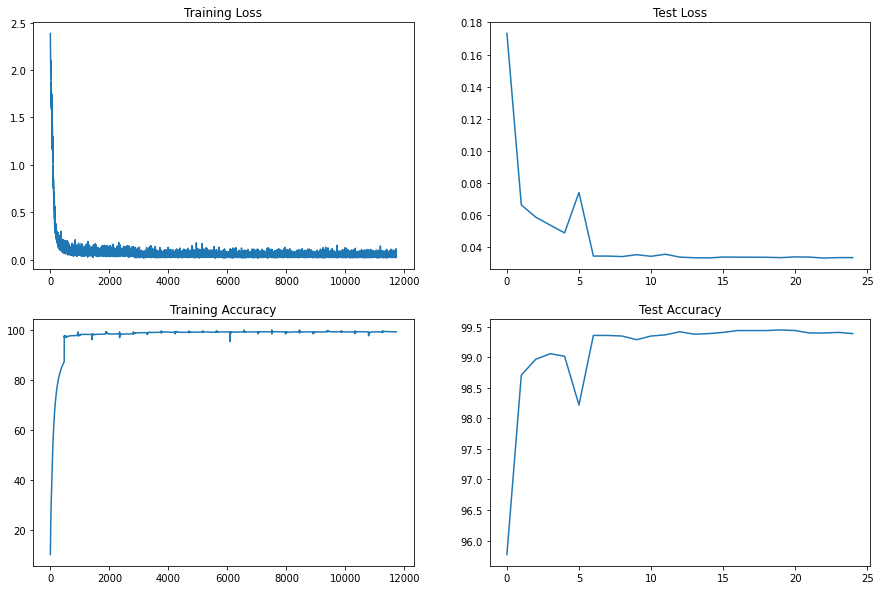

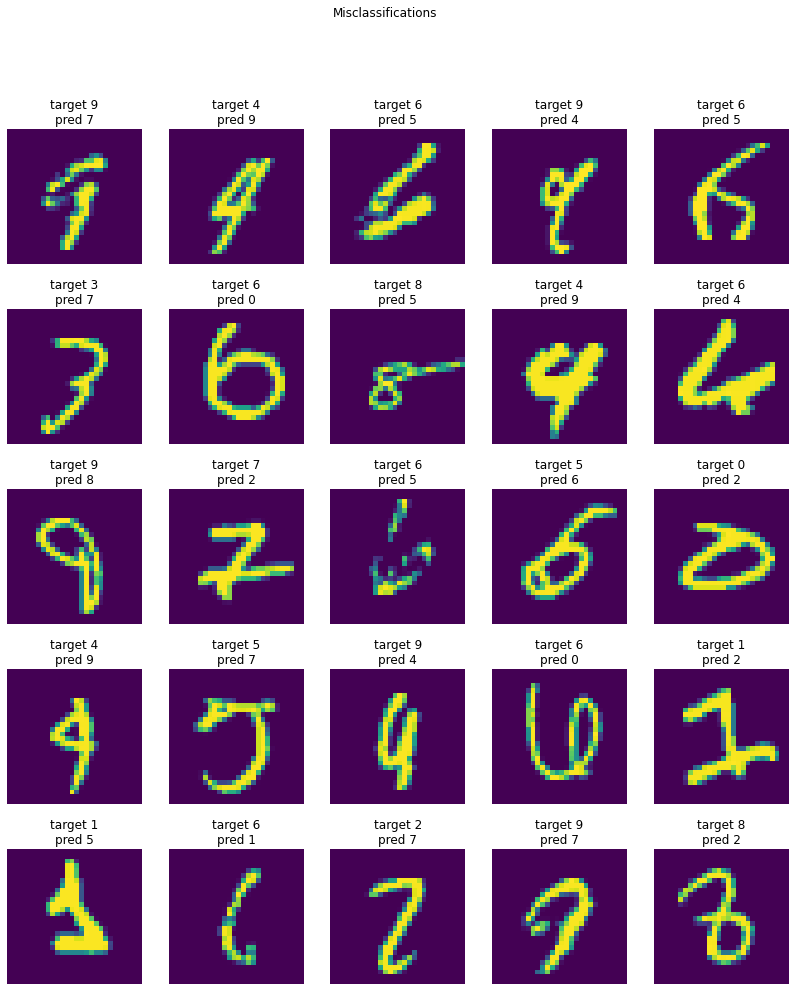

  0%|          | 0/469 [00:00<?, ?it/s]


-----------------------------------------------

-----------------------------------------------
bn_l2
EPOCH: 0 last LR= [0.01] LR =  [0.01]


Train set: Loss=0.34761136770248413 Batch_id=468 Accuracy=86.58: 100%|██████████| 469/469 [00:23<00:00, 19.95it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0915, Accuracy: 9786/10000 (97.86%)

EPOCH: 1 last LR= [0.01] LR =  [0.01]


Train set: Loss=0.2126077562570572 Batch_id=468 Accuracy=97.77: 100%|██████████| 469/469 [00:23<00:00, 20.38it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0430, Accuracy: 9890/10000 (98.90%)

EPOCH: 2 last LR= [0.01] LR =  [0.01]


Train set: Loss=0.21556372940540314 Batch_id=468 Accuracy=97.99: 100%|██████████| 469/469 [00:23<00:00, 20.35it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0460, Accuracy: 9869/10000 (98.69%)

EPOCH: 3 last LR= [0.01] LR =  [0.01]


Train set: Loss=0.22458094358444214 Batch_id=468 Accuracy=98.11: 100%|██████████| 469/469 [00:23<00:00, 20.36it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0498, Accuracy: 9843/10000 (98.43%)

EPOCH: 4 last LR= [0.01] LR =  [0.01]


Train set: Loss=0.2334919571876526 Batch_id=468 Accuracy=98.17: 100%|██████████| 469/469 [00:22<00:00, 20.72it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0595, Accuracy: 9816/10000 (98.16%)

EPOCH: 5 last LR= [0.01] LR =  [0.01]


Train set: Loss=0.2028162032365799 Batch_id=468 Accuracy=98.25: 100%|██████████| 469/469 [00:22<00:00, 20.64it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0499, Accuracy: 9837/10000 (98.37%)

EPOCH: 6 last LR= [0.001] LR =  [0.0001]


Train set: Loss=0.17559318244457245 Batch_id=468 Accuracy=98.89: 100%|██████████| 469/469 [00:22<00:00, 20.39it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0212, Accuracy: 9943/10000 (99.43%)

EPOCH: 7 last LR= [0.001] LR =  [0.001]


Train set: Loss=0.18271929025650024 Batch_id=468 Accuracy=99.09: 100%|██████████| 469/469 [00:22<00:00, 20.73it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0197, Accuracy: 9940/10000 (99.40%)

EPOCH: 8 last LR= [0.001] LR =  [0.001]


Train set: Loss=0.2157289683818817 Batch_id=468 Accuracy=99.10: 100%|██████████| 469/469 [00:23<00:00, 20.19it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0190, Accuracy: 9939/10000 (99.39%)

EPOCH: 9 last LR= [0.001] LR =  [0.001]


Train set: Loss=0.14735627174377441 Batch_id=468 Accuracy=99.10: 100%|██████████| 469/469 [00:23<00:00, 19.85it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0206, Accuracy: 9937/10000 (99.37%)

EPOCH: 10 last LR= [0.001] LR =  [0.001]


Train set: Loss=0.14631272852420807 Batch_id=468 Accuracy=99.18: 100%|██████████| 469/469 [00:22<00:00, 20.39it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0195, Accuracy: 9942/10000 (99.42%)

EPOCH: 11 last LR= [0.001] LR =  [0.001]


Train set: Loss=0.18358762562274933 Batch_id=468 Accuracy=99.20: 100%|██████████| 469/469 [00:22<00:00, 20.43it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0196, Accuracy: 9942/10000 (99.42%)

EPOCH: 12 last LR= [0.0001] LR =  [1e-05]


Train set: Loss=0.1476064771413803 Batch_id=468 Accuracy=99.24: 100%|██████████| 469/469 [00:23<00:00, 20.21it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0187, Accuracy: 9942/10000 (99.42%)

EPOCH: 13 last LR= [0.0001] LR =  [0.0001]


Train set: Loss=0.1572137027978897 Batch_id=468 Accuracy=99.24: 100%|██████████| 469/469 [00:22<00:00, 20.45it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0183, Accuracy: 9944/10000 (99.44%)

EPOCH: 14 last LR= [0.0001] LR =  [0.0001]


Train set: Loss=0.13485315442085266 Batch_id=468 Accuracy=99.31: 100%|██████████| 469/469 [00:22<00:00, 20.75it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0183, Accuracy: 9945/10000 (99.45%)

EPOCH: 15 last LR= [0.0001] LR =  [0.0001]


Train set: Loss=0.15273889899253845 Batch_id=468 Accuracy=99.22: 100%|██████████| 469/469 [00:23<00:00, 20.36it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0185, Accuracy: 9939/10000 (99.39%)

EPOCH: 16 last LR= [0.0001] LR =  [0.0001]


Train set: Loss=0.1528874635696411 Batch_id=468 Accuracy=99.18: 100%|██████████| 469/469 [00:22<00:00, 20.71it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0183, Accuracy: 9939/10000 (99.39%)

EPOCH: 17 last LR= [0.0001] LR =  [0.0001]


Train set: Loss=0.13463668525218964 Batch_id=468 Accuracy=99.29: 100%|██████████| 469/469 [00:22<00:00, 20.85it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0186, Accuracy: 9941/10000 (99.41%)

EPOCH: 18 last LR= [1e-05] LR =  [1.0000000000000002e-06]


Train set: Loss=0.1801641434431076 Batch_id=468 Accuracy=99.24: 100%|██████████| 469/469 [00:23<00:00, 20.07it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0184, Accuracy: 9945/10000 (99.45%)

EPOCH: 19 last LR= [1e-05] LR =  [1e-05]


Train set: Loss=0.13732460141181946 Batch_id=468 Accuracy=99.27: 100%|██████████| 469/469 [00:22<00:00, 20.42it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0184, Accuracy: 9943/10000 (99.43%)

EPOCH: 20 last LR= [1e-05] LR =  [1e-05]


Train set: Loss=0.1602926254272461 Batch_id=468 Accuracy=99.25: 100%|██████████| 469/469 [00:23<00:00, 20.35it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0188, Accuracy: 9938/10000 (99.38%)

EPOCH: 21 last LR= [1e-05] LR =  [1e-05]


Train set: Loss=0.17472819983959198 Batch_id=468 Accuracy=99.27: 100%|██████████| 469/469 [00:23<00:00, 20.18it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0184, Accuracy: 9942/10000 (99.42%)

EPOCH: 22 last LR= [1e-05] LR =  [1e-05]


Train set: Loss=0.1552465260028839 Batch_id=468 Accuracy=99.31: 100%|██████████| 469/469 [00:23<00:00, 20.18it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0183, Accuracy: 9944/10000 (99.44%)

EPOCH: 23 last LR= [1e-05] LR =  [1e-05]


Train set: Loss=0.14637750387191772 Batch_id=468 Accuracy=99.25: 100%|██████████| 469/469 [00:23<00:00, 20.29it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0184, Accuracy: 9943/10000 (99.43%)

EPOCH: 24 last LR= [1.0000000000000002e-06] LR =  [1.0000000000000002e-07]


Train set: Loss=0.13590598106384277 Batch_id=468 Accuracy=99.25: 100%|██████████| 469/469 [00:23<00:00, 20.09it/s]



Test set: Average loss: 0.0184, Accuracy: 9939/10000 (99.39%)

Total Misclassifications : 61


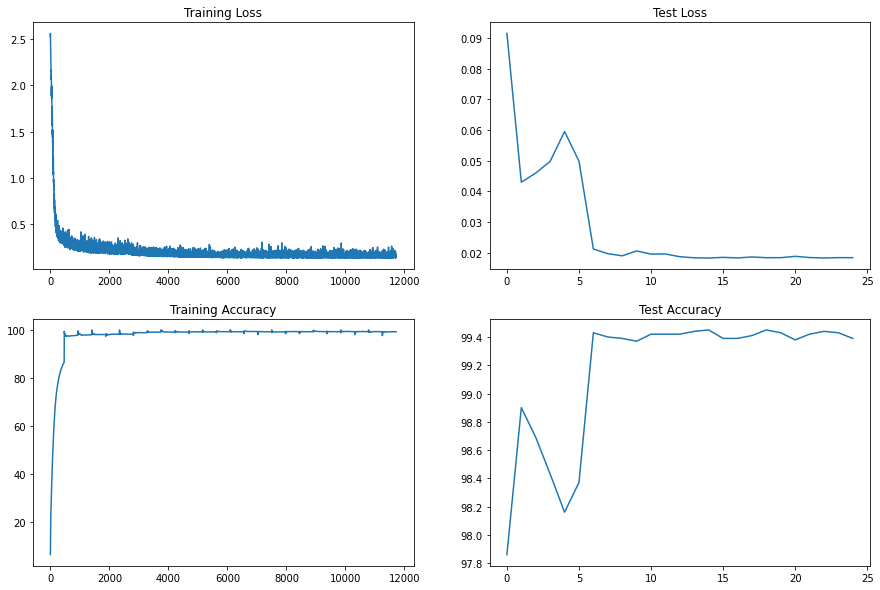

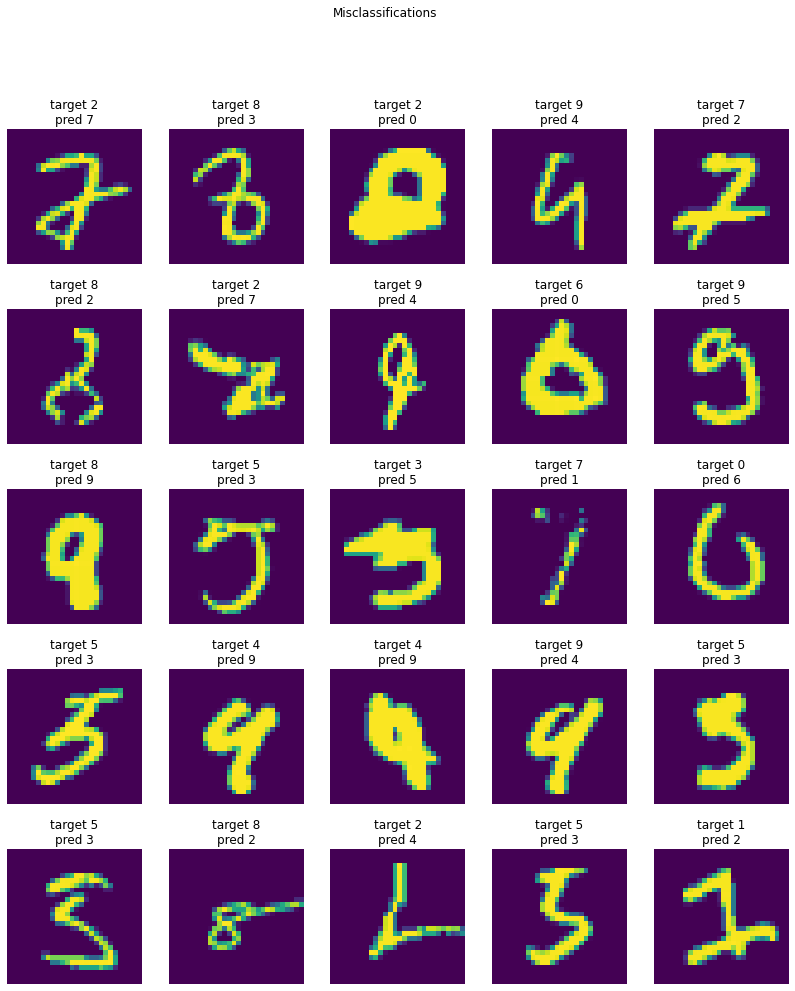

  0%|          | 0/469 [00:00<?, ?it/s]


-----------------------------------------------

-----------------------------------------------
bn_l1_l2
EPOCH: 0 last LR= [0.01] LR =  [0.01]


Train set: Loss=0.32568565011024475 Batch_id=468 Accuracy=88.92: 100%|██████████| 469/469 [00:23<00:00, 19.95it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1100, Accuracy: 9785/10000 (97.85%)

EPOCH: 1 last LR= [0.01] LR =  [0.01]


Train set: Loss=0.21399590373039246 Batch_id=468 Accuracy=97.58: 100%|██████████| 469/469 [00:24<00:00, 19.28it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0886, Accuracy: 9792/10000 (97.92%)

EPOCH: 2 last LR= [0.01] LR =  [0.01]


Train set: Loss=0.21405667066574097 Batch_id=468 Accuracy=97.88: 100%|██████████| 469/469 [00:23<00:00, 19.56it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0985, Accuracy: 9771/10000 (97.71%)

EPOCH: 3 last LR= [0.01] LR =  [0.01]


Train set: Loss=0.2569386065006256 Batch_id=468 Accuracy=97.79: 100%|██████████| 469/469 [00:23<00:00, 19.55it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0971, Accuracy: 9775/10000 (97.75%)

EPOCH: 4 last LR= [0.01] LR =  [0.01]


Train set: Loss=0.16596685349941254 Batch_id=468 Accuracy=97.91: 100%|██████████| 469/469 [00:23<00:00, 20.29it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0891, Accuracy: 9823/10000 (98.23%)

EPOCH: 5 last LR= [0.01] LR =  [0.01]


Train set: Loss=0.1743452399969101 Batch_id=468 Accuracy=97.88: 100%|██████████| 469/469 [00:23<00:00, 19.63it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1057, Accuracy: 9766/10000 (97.66%)

EPOCH: 6 last LR= [0.001] LR =  [0.0001]


Train set: Loss=0.16157785058021545 Batch_id=468 Accuracy=98.72: 100%|██████████| 469/469 [00:23<00:00, 19.62it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0355, Accuracy: 9926/10000 (99.26%)

EPOCH: 7 last LR= [0.001] LR =  [0.001]


Train set: Loss=0.17844821512699127 Batch_id=468 Accuracy=98.96: 100%|██████████| 469/469 [00:24<00:00, 19.48it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0346, Accuracy: 9930/10000 (99.30%)

EPOCH: 8 last LR= [0.001] LR =  [0.001]


Train set: Loss=0.1526866853237152 Batch_id=468 Accuracy=98.98: 100%|██████████| 469/469 [00:24<00:00, 19.03it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0360, Accuracy: 9929/10000 (99.29%)

EPOCH: 9 last LR= [0.001] LR =  [0.001]


Train set: Loss=0.12538039684295654 Batch_id=468 Accuracy=98.96: 100%|██████████| 469/469 [00:23<00:00, 19.67it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0358, Accuracy: 9925/10000 (99.25%)

EPOCH: 10 last LR= [0.001] LR =  [0.001]


Train set: Loss=0.145834818482399 Batch_id=468 Accuracy=99.00: 100%|██████████| 469/469 [00:24<00:00, 19.45it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0365, Accuracy: 9927/10000 (99.27%)

EPOCH: 11 last LR= [0.001] LR =  [0.001]


Train set: Loss=0.13536658883094788 Batch_id=468 Accuracy=98.90: 100%|██████████| 469/469 [00:24<00:00, 19.44it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0391, Accuracy: 9919/10000 (99.19%)

EPOCH: 12 last LR= [0.0001] LR =  [1e-05]


Train set: Loss=0.13931086659431458 Batch_id=468 Accuracy=99.11: 100%|██████████| 469/469 [00:24<00:00, 19.41it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0339, Accuracy: 9932/10000 (99.32%)

EPOCH: 13 last LR= [0.0001] LR =  [0.0001]


Train set: Loss=0.10966458916664124 Batch_id=468 Accuracy=99.13: 100%|██████████| 469/469 [00:24<00:00, 19.40it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0335, Accuracy: 9938/10000 (99.38%)

EPOCH: 14 last LR= [0.0001] LR =  [0.0001]


Train set: Loss=0.2017374485731125 Batch_id=468 Accuracy=99.11: 100%|██████████| 469/469 [00:23<00:00, 19.83it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0330, Accuracy: 9934/10000 (99.34%)

EPOCH: 15 last LR= [0.0001] LR =  [0.0001]


Train set: Loss=0.14286372065544128 Batch_id=468 Accuracy=99.15: 100%|██████████| 469/469 [00:23<00:00, 19.56it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0331, Accuracy: 9937/10000 (99.37%)

EPOCH: 16 last LR= [0.0001] LR =  [0.0001]


Train set: Loss=0.11566929519176483 Batch_id=468 Accuracy=99.13: 100%|██████████| 469/469 [00:23<00:00, 20.07it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0329, Accuracy: 9934/10000 (99.34%)

EPOCH: 17 last LR= [0.0001] LR =  [0.0001]


Train set: Loss=0.14344964921474457 Batch_id=468 Accuracy=99.13: 100%|██████████| 469/469 [00:24<00:00, 19.04it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0329, Accuracy: 9930/10000 (99.30%)

EPOCH: 18 last LR= [1e-05] LR =  [1.0000000000000002e-06]


Train set: Loss=0.19014540314674377 Batch_id=468 Accuracy=99.17: 100%|██████████| 469/469 [00:24<00:00, 19.47it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0327, Accuracy: 9936/10000 (99.36%)

EPOCH: 19 last LR= [1e-05] LR =  [1e-05]


Train set: Loss=0.11673104763031006 Batch_id=468 Accuracy=99.15: 100%|██████████| 469/469 [00:24<00:00, 19.42it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0327, Accuracy: 9934/10000 (99.34%)

EPOCH: 20 last LR= [1e-05] LR =  [1e-05]


Train set: Loss=0.1009581908583641 Batch_id=468 Accuracy=99.18: 100%|██████████| 469/469 [00:23<00:00, 20.00it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0326, Accuracy: 9930/10000 (99.30%)

EPOCH: 21 last LR= [1e-05] LR =  [1e-05]


Train set: Loss=0.10920815169811249 Batch_id=468 Accuracy=99.14: 100%|██████████| 469/469 [00:23<00:00, 19.54it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0326, Accuracy: 9934/10000 (99.34%)

EPOCH: 22 last LR= [1e-05] LR =  [1e-05]


Train set: Loss=0.1547621786594391 Batch_id=468 Accuracy=99.19: 100%|██████████| 469/469 [00:24<00:00, 18.92it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0324, Accuracy: 9935/10000 (99.35%)

EPOCH: 23 last LR= [1e-05] LR =  [1e-05]


Train set: Loss=0.1260417252779007 Batch_id=468 Accuracy=99.17: 100%|██████████| 469/469 [00:24<00:00, 19.24it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0328, Accuracy: 9934/10000 (99.34%)

EPOCH: 24 last LR= [1.0000000000000002e-06] LR =  [1.0000000000000002e-07]


Train set: Loss=0.12360101193189621 Batch_id=468 Accuracy=99.17: 100%|██████████| 469/469 [00:24<00:00, 19.24it/s]



Test set: Average loss: 0.0324, Accuracy: 9936/10000 (99.36%)

Total Misclassifications : 64


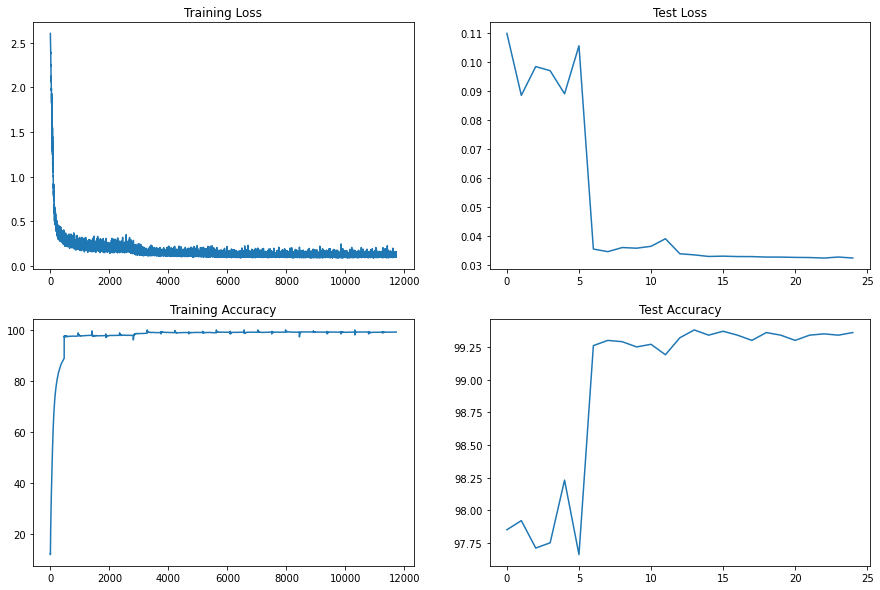

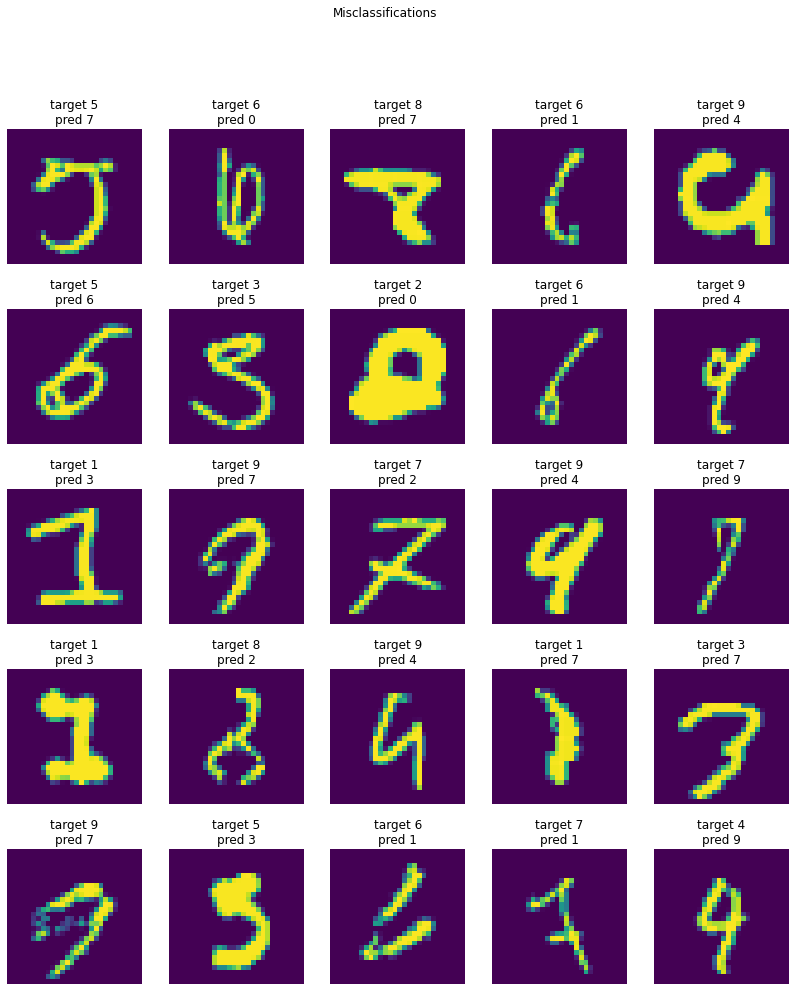

  0%|          | 0/469 [00:00<?, ?it/s]


-----------------------------------------------

-----------------------------------------------
gbn
EPOCH: 0 last LR= [0.01] LR =  [0.01]


Train set: Loss=0.11259683221578598 Batch_id=468 Accuracy=87.58: 100%|██████████| 469/469 [00:24<00:00, 18.85it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0715, Accuracy: 9820/10000 (98.20%)

EPOCH: 1 last LR= [0.01] LR =  [0.01]


Train set: Loss=0.0866292417049408 Batch_id=468 Accuracy=97.69: 100%|██████████| 469/469 [00:24<00:00, 18.80it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0466, Accuracy: 9869/10000 (98.69%)

EPOCH: 2 last LR= [0.01] LR =  [0.01]


Train set: Loss=0.0382213331758976 Batch_id=468 Accuracy=98.17: 100%|██████████| 469/469 [00:24<00:00, 18.99it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0421, Accuracy: 9879/10000 (98.79%)

EPOCH: 3 last LR= [0.01] LR =  [0.01]


Train set: Loss=0.04853540286421776 Batch_id=468 Accuracy=98.30: 100%|██████████| 469/469 [00:25<00:00, 18.68it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0397, Accuracy: 9889/10000 (98.89%)

EPOCH: 4 last LR= [0.01] LR =  [0.01]


Train set: Loss=0.043294668197631836 Batch_id=468 Accuracy=98.42: 100%|██████████| 469/469 [00:25<00:00, 18.64it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0292, Accuracy: 9913/10000 (99.13%)

EPOCH: 5 last LR= [0.01] LR =  [0.01]


Train set: Loss=0.10271713137626648 Batch_id=468 Accuracy=98.61: 100%|██████████| 469/469 [00:24<00:00, 19.52it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0284, Accuracy: 9917/10000 (99.17%)

EPOCH: 6 last LR= [0.001] LR =  [0.0001]


Train set: Loss=0.12016639113426208 Batch_id=468 Accuracy=99.00: 100%|██████████| 469/469 [00:24<00:00, 19.48it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0219, Accuracy: 9932/10000 (99.32%)

EPOCH: 7 last LR= [0.001] LR =  [0.001]


Train set: Loss=0.013607806526124477 Batch_id=468 Accuracy=98.94: 100%|██████████| 469/469 [00:23<00:00, 19.62it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0219, Accuracy: 9933/10000 (99.33%)

EPOCH: 8 last LR= [0.001] LR =  [0.001]


Train set: Loss=0.017460649833083153 Batch_id=468 Accuracy=99.01: 100%|██████████| 469/469 [00:24<00:00, 19.03it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0214, Accuracy: 9934/10000 (99.34%)

EPOCH: 9 last LR= [0.001] LR =  [0.001]


Train set: Loss=0.050038423389196396 Batch_id=468 Accuracy=99.04: 100%|██████████| 469/469 [00:24<00:00, 19.08it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0206, Accuracy: 9939/10000 (99.39%)

EPOCH: 10 last LR= [0.001] LR =  [0.001]


Train set: Loss=0.038520582020282745 Batch_id=468 Accuracy=99.01: 100%|██████████| 469/469 [00:23<00:00, 19.72it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0202, Accuracy: 9941/10000 (99.41%)

EPOCH: 11 last LR= [0.001] LR =  [0.001]


Train set: Loss=0.03878030180931091 Batch_id=468 Accuracy=99.01: 100%|██████████| 469/469 [00:23<00:00, 19.68it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0208, Accuracy: 9933/10000 (99.33%)

EPOCH: 12 last LR= [0.0001] LR =  [1e-05]


Train set: Loss=0.03881114348769188 Batch_id=468 Accuracy=99.16: 100%|██████████| 469/469 [00:23<00:00, 19.72it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0208, Accuracy: 9937/10000 (99.37%)

EPOCH: 13 last LR= [0.0001] LR =  [0.0001]


Train set: Loss=0.013172275386750698 Batch_id=468 Accuracy=99.03: 100%|██████████| 469/469 [00:23<00:00, 20.15it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0205, Accuracy: 9932/10000 (99.32%)

EPOCH: 14 last LR= [0.0001] LR =  [0.0001]


Train set: Loss=0.016883954405784607 Batch_id=468 Accuracy=99.05: 100%|██████████| 469/469 [00:24<00:00, 19.44it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0206, Accuracy: 9933/10000 (99.33%)

EPOCH: 15 last LR= [0.0001] LR =  [0.0001]


Train set: Loss=0.0113835409283638 Batch_id=468 Accuracy=99.06: 100%|██████████| 469/469 [00:23<00:00, 20.06it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0203, Accuracy: 9935/10000 (99.35%)

EPOCH: 16 last LR= [0.0001] LR =  [0.0001]


Train set: Loss=0.015178903006017208 Batch_id=468 Accuracy=99.05: 100%|██████████| 469/469 [00:23<00:00, 19.91it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0207, Accuracy: 9930/10000 (99.30%)

EPOCH: 17 last LR= [0.0001] LR =  [0.0001]


Train set: Loss=0.03261478617787361 Batch_id=468 Accuracy=99.10: 100%|██████████| 469/469 [00:24<00:00, 19.28it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0202, Accuracy: 9936/10000 (99.36%)

EPOCH: 18 last LR= [1e-05] LR =  [1.0000000000000002e-06]


Train set: Loss=0.009787620045244694 Batch_id=468 Accuracy=99.09: 100%|██████████| 469/469 [00:24<00:00, 19.33it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0203, Accuracy: 9934/10000 (99.34%)

EPOCH: 19 last LR= [1e-05] LR =  [1e-05]


Train set: Loss=0.01024895440787077 Batch_id=468 Accuracy=99.00: 100%|██████████| 469/469 [00:23<00:00, 19.62it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0200, Accuracy: 9933/10000 (99.33%)

EPOCH: 20 last LR= [1e-05] LR =  [1e-05]


Train set: Loss=0.01727801188826561 Batch_id=468 Accuracy=99.11: 100%|██████████| 469/469 [00:23<00:00, 19.98it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0208, Accuracy: 9932/10000 (99.32%)

EPOCH: 21 last LR= [1e-05] LR =  [1e-05]


Train set: Loss=0.042392831295728683 Batch_id=468 Accuracy=99.04: 100%|██████████| 469/469 [00:23<00:00, 19.93it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0202, Accuracy: 9936/10000 (99.36%)

EPOCH: 22 last LR= [1e-05] LR =  [1e-05]


Train set: Loss=0.01805132068693638 Batch_id=468 Accuracy=99.11: 100%|██████████| 469/469 [00:23<00:00, 20.00it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0201, Accuracy: 9936/10000 (99.36%)

EPOCH: 23 last LR= [1e-05] LR =  [1e-05]


Train set: Loss=0.028566697612404823 Batch_id=468 Accuracy=99.13: 100%|██████████| 469/469 [00:23<00:00, 20.21it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0204, Accuracy: 9933/10000 (99.33%)

EPOCH: 24 last LR= [1.0000000000000002e-06] LR =  [1.0000000000000002e-07]


Train set: Loss=0.01134586613625288 Batch_id=468 Accuracy=99.07: 100%|██████████| 469/469 [00:23<00:00, 19.93it/s]



Test set: Average loss: 0.0203, Accuracy: 9937/10000 (99.37%)

Total Misclassifications : 63


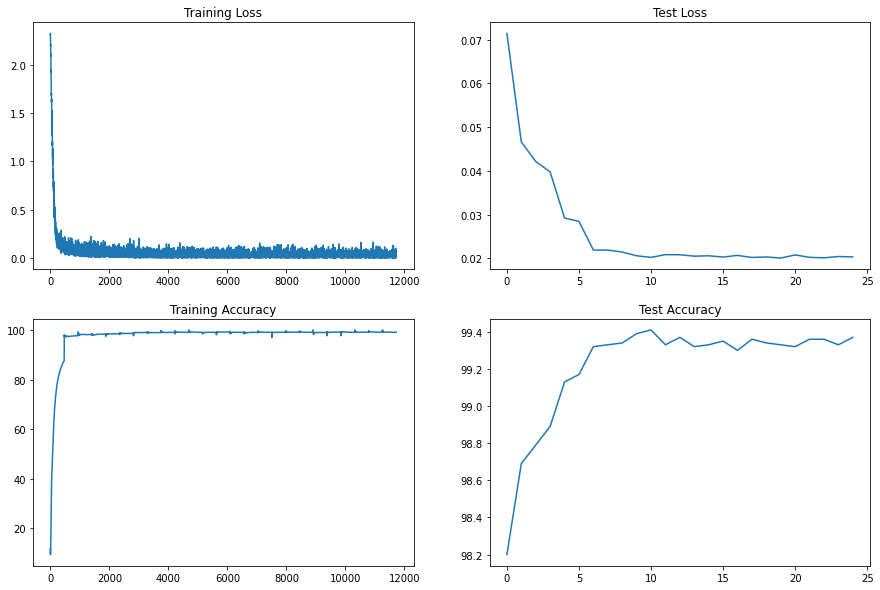

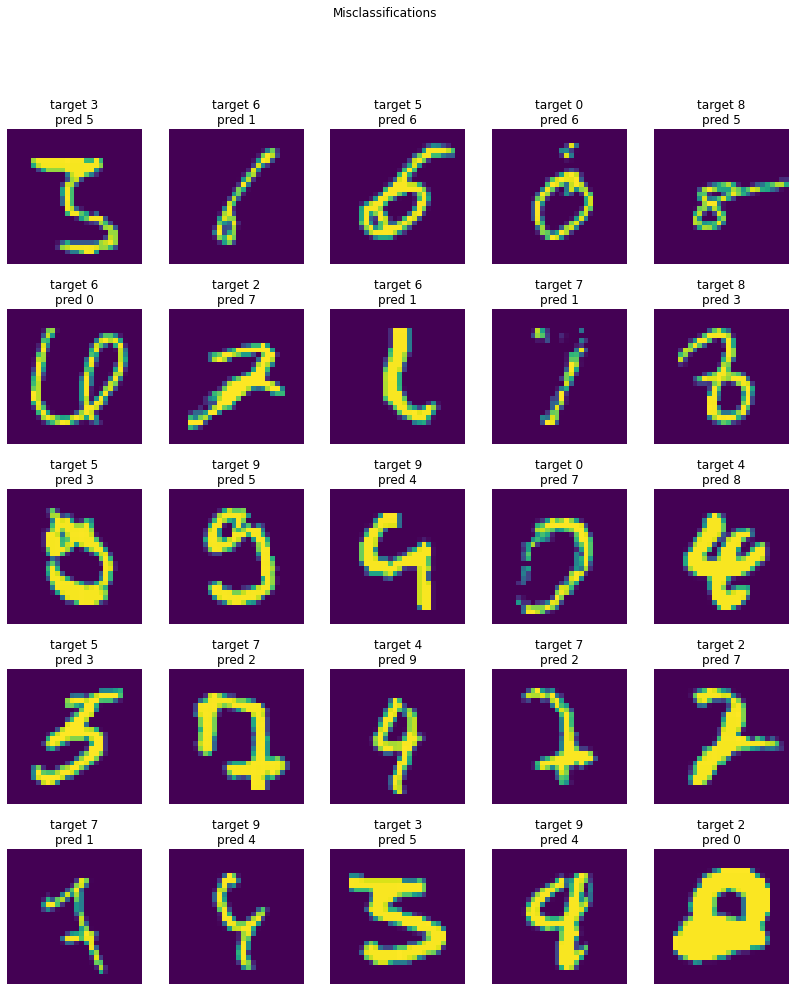

  0%|          | 0/469 [00:00<?, ?it/s]


-----------------------------------------------

-----------------------------------------------
gbn_l1_l2
EPOCH: 0 last LR= [0.01] LR =  [0.01]


Train set: Loss=0.33770596981048584 Batch_id=468 Accuracy=85.78: 100%|██████████| 469/469 [00:24<00:00, 19.20it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1050, Accuracy: 9779/10000 (97.79%)

EPOCH: 1 last LR= [0.01] LR =  [0.01]


Train set: Loss=0.2860614061355591 Batch_id=468 Accuracy=97.12: 100%|██████████| 469/469 [00:24<00:00, 18.99it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0866, Accuracy: 9815/10000 (98.15%)

EPOCH: 2 last LR= [0.01] LR =  [0.01]


Train set: Loss=0.18352100253105164 Batch_id=468 Accuracy=97.47: 100%|██████████| 469/469 [00:23<00:00, 19.82it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0995, Accuracy: 9773/10000 (97.73%)

EPOCH: 3 last LR= [0.01] LR =  [0.01]


Train set: Loss=0.22890037298202515 Batch_id=468 Accuracy=97.49: 100%|██████████| 469/469 [00:23<00:00, 19.92it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0902, Accuracy: 9787/10000 (97.87%)

EPOCH: 4 last LR= [0.01] LR =  [0.01]


Train set: Loss=0.21915093064308167 Batch_id=468 Accuracy=97.60: 100%|██████████| 469/469 [00:23<00:00, 19.75it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0858, Accuracy: 9836/10000 (98.36%)

EPOCH: 5 last LR= [0.01] LR =  [0.01]


Train set: Loss=0.2288399338722229 Batch_id=468 Accuracy=97.65: 100%|██████████| 469/469 [00:23<00:00, 19.68it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0961, Accuracy: 9762/10000 (97.62%)

EPOCH: 6 last LR= [0.001] LR =  [0.0001]


Train set: Loss=0.15594372153282166 Batch_id=468 Accuracy=98.50: 100%|██████████| 469/469 [00:24<00:00, 19.54it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0336, Accuracy: 9933/10000 (99.33%)

EPOCH: 7 last LR= [0.001] LR =  [0.001]


Train set: Loss=0.18358291685581207 Batch_id=468 Accuracy=98.64: 100%|██████████| 469/469 [00:23<00:00, 19.83it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0350, Accuracy: 9933/10000 (99.33%)

EPOCH: 8 last LR= [0.001] LR =  [0.001]


Train set: Loss=0.12808212637901306 Batch_id=468 Accuracy=98.68: 100%|██████████| 469/469 [00:23<00:00, 19.66it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0340, Accuracy: 9933/10000 (99.33%)

EPOCH: 9 last LR= [0.001] LR =  [0.001]


Train set: Loss=0.14703381061553955 Batch_id=468 Accuracy=98.66: 100%|██████████| 469/469 [00:23<00:00, 20.00it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0334, Accuracy: 9928/10000 (99.28%)

EPOCH: 10 last LR= [0.001] LR =  [0.001]


Train set: Loss=0.1756565123796463 Batch_id=468 Accuracy=98.67: 100%|██████████| 469/469 [00:23<00:00, 20.02it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0350, Accuracy: 9935/10000 (99.35%)

EPOCH: 11 last LR= [0.001] LR =  [0.001]


Train set: Loss=0.12697766721248627 Batch_id=468 Accuracy=98.68: 100%|██████████| 469/469 [00:23<00:00, 20.10it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0413, Accuracy: 9919/10000 (99.19%)

EPOCH: 12 last LR= [0.0001] LR =  [1e-05]


Train set: Loss=0.15318073332309723 Batch_id=468 Accuracy=98.85: 100%|██████████| 469/469 [00:24<00:00, 19.11it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0312, Accuracy: 9936/10000 (99.36%)

EPOCH: 13 last LR= [0.0001] LR =  [0.0001]


Train set: Loss=0.14451955258846283 Batch_id=468 Accuracy=98.84: 100%|██████████| 469/469 [00:23<00:00, 19.83it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0305, Accuracy: 9940/10000 (99.40%)

EPOCH: 14 last LR= [0.0001] LR =  [0.0001]


Train set: Loss=0.1413954347372055 Batch_id=468 Accuracy=98.94: 100%|██████████| 469/469 [00:24<00:00, 19.07it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0306, Accuracy: 9941/10000 (99.41%)

EPOCH: 15 last LR= [0.0001] LR =  [0.0001]


Train set: Loss=0.15112867951393127 Batch_id=468 Accuracy=98.91: 100%|██████████| 469/469 [00:24<00:00, 19.51it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0314, Accuracy: 9939/10000 (99.39%)

EPOCH: 16 last LR= [0.0001] LR =  [0.0001]


Train set: Loss=0.13985371589660645 Batch_id=468 Accuracy=98.88: 100%|██████████| 469/469 [00:24<00:00, 19.23it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0304, Accuracy: 9941/10000 (99.41%)

EPOCH: 17 last LR= [0.0001] LR =  [0.0001]


Train set: Loss=0.15867400169372559 Batch_id=468 Accuracy=98.89: 100%|██████████| 469/469 [00:24<00:00, 19.33it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0304, Accuracy: 9939/10000 (99.39%)

EPOCH: 18 last LR= [1e-05] LR =  [1.0000000000000002e-06]


Train set: Loss=0.1359001100063324 Batch_id=468 Accuracy=98.89: 100%|██████████| 469/469 [00:23<00:00, 19.85it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0305, Accuracy: 9938/10000 (99.38%)

EPOCH: 19 last LR= [1e-05] LR =  [1e-05]


Train set: Loss=0.1181640625 Batch_id=468 Accuracy=98.94: 100%|██████████| 469/469 [00:23<00:00, 19.86it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0302, Accuracy: 9942/10000 (99.42%)

EPOCH: 20 last LR= [1e-05] LR =  [1e-05]


Train set: Loss=0.12059755623340607 Batch_id=468 Accuracy=98.93: 100%|██████████| 469/469 [00:23<00:00, 19.68it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0303, Accuracy: 9938/10000 (99.38%)

EPOCH: 21 last LR= [1e-05] LR =  [1e-05]


Train set: Loss=0.13086840510368347 Batch_id=468 Accuracy=98.87: 100%|██████████| 469/469 [00:23<00:00, 19.71it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0304, Accuracy: 9941/10000 (99.41%)

EPOCH: 22 last LR= [1e-05] LR =  [1e-05]


Train set: Loss=0.1493665724992752 Batch_id=468 Accuracy=98.92: 100%|██████████| 469/469 [00:23<00:00, 19.87it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0300, Accuracy: 9939/10000 (99.39%)

EPOCH: 23 last LR= [1e-05] LR =  [1e-05]


Train set: Loss=0.16243334114551544 Batch_id=468 Accuracy=98.94: 100%|██████████| 469/469 [00:24<00:00, 19.27it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0302, Accuracy: 9943/10000 (99.43%)

EPOCH: 24 last LR= [1.0000000000000002e-06] LR =  [1.0000000000000002e-07]


Train set: Loss=0.12229037284851074 Batch_id=468 Accuracy=98.91: 100%|██████████| 469/469 [00:23<00:00, 19.60it/s]



Test set: Average loss: 0.0300, Accuracy: 9942/10000 (99.42%)

Total Misclassifications : 58


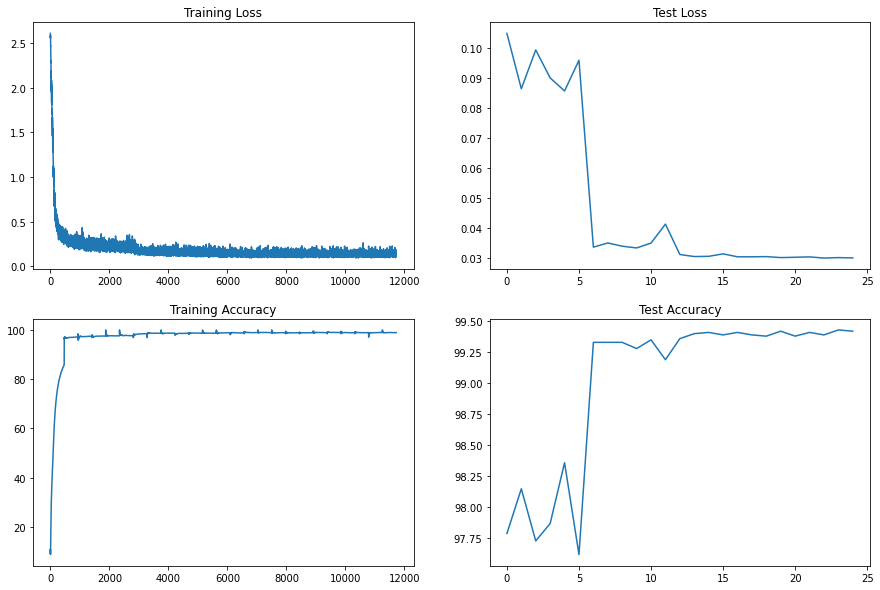

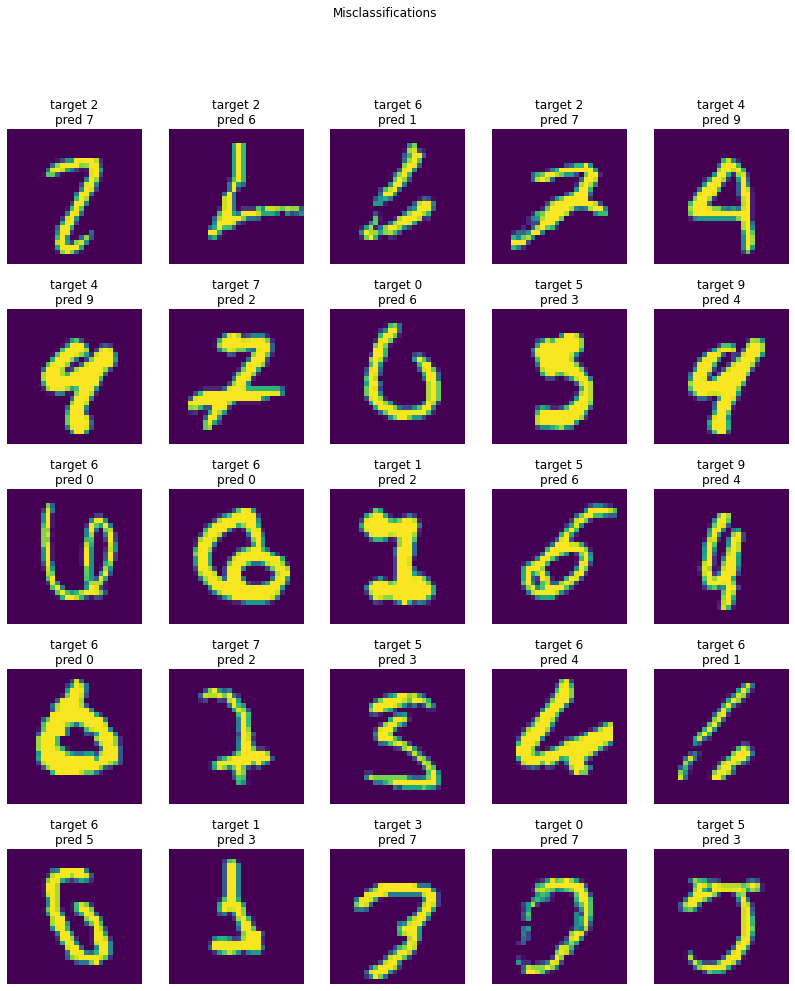

In [29]:
trail_iterations = [('bn_l1', model_bn, 5e-3, 0), ('bn_l2', model_bn, 0, 5e-4), ('bn_l1_l2', model_bn,5e-3, 5e-4) , 
                    ('gbn', model_gbn,0,0), ('gbn_l1_l2', model_gbn, 5e-3, 5e-4)]

metric_acc_values = []
metric_loss_values = []

for i, trail in enumerate(trail_iterations):
  print("\n-----------------------------------------------")
  print("\n-----------------------------------------------")
  print(trail[0])
  EPOCHS = 25
  if i in (0,1,2):
    myModel = Net().to(device)
  else:
    myModel = NetWithGBN(0.01).to(device)
  optimizer = optim.SGD(myModel.parameters(), lr=0.01, momentum=0.9, weight_decay=trail[2])
  scheduler = StepLR(optimizer, step_size=6, gamma=0.1)

  trainer = Trainer()

  for epoch in range(EPOCHS):
      print("EPOCH:", epoch, "last LR=",scheduler.get_last_lr(), "LR = ", scheduler.get_lr())
      # def train(model, device, train_loader, optimizer, epoch, lambda_l1):
      trainer.train(myModel, device, train_loader, optimizer, epoch, trail[3])
      trainer.test(myModel, device, test_loader)
      scheduler.step() # for StepLR

  (train_losses, test_losses, train_acc, test_acc) = trainer.getValues()

  plot_metrics(train_losses, train_acc, test_losses, test_acc)
  metric_acc_values.extend([test_acc])
  metric_loss_values.extend([test_losses])
  # get_misclassified(self, model, test_loader, device):
  misclassifications = trainer.get_misclassified(myModel, test_loader, device)
  plot_misclassification(misclassified=misclassifications)

In [30]:
def plot_acc_loss(acc_loss, msg):
    plt.figure(figsize=(12,12))
    plt.plot(acc_loss[0],color='Red',   label='BN_L1')
    plt.plot(acc_loss[1],color='Blue',     label='BN_L2')
    plt.plot(acc_loss[2],color='Green',    label='BN_L1_L2')
    plt.plot(acc_loss[3],color='Yellow',  label='GBN')
    plt.plot(acc_loss[4],color='Black', label='GBN_L1_L2')
        
    plt.xlabel(' Epochs ')

    if msg == 'Loss':
        plt.ylabel(' Loss ')
        plt.title('Total losses vs Epochs')
    elif msg == 'Acc':
        plt.ylabel(' Accuracy ')
        plt.title('Total accuracy vs Epochs')

    plt.legend(loc = 'upper left' , bbox_to_anchor = (1,1))
    plt.legend()
    
    plt.show()

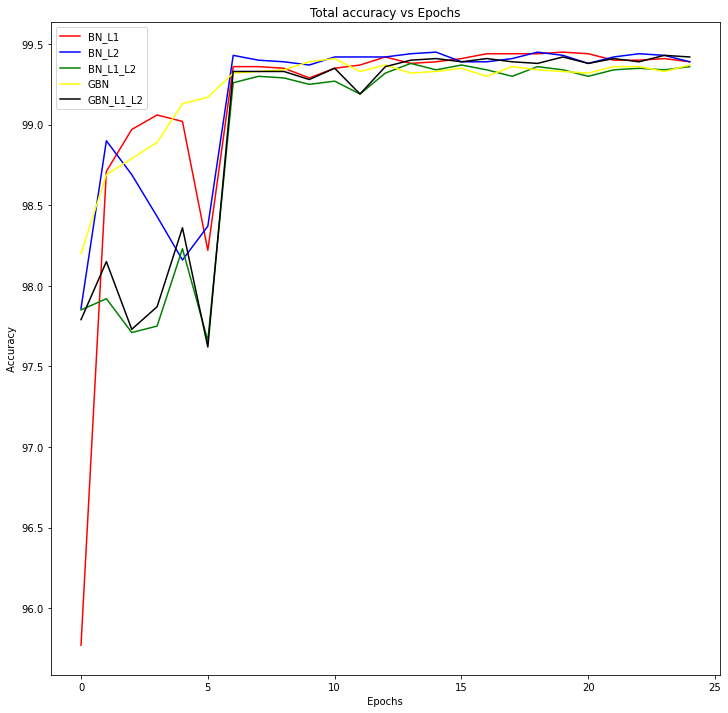

In [31]:
plot_acc_loss(metric_acc_values, "Acc")

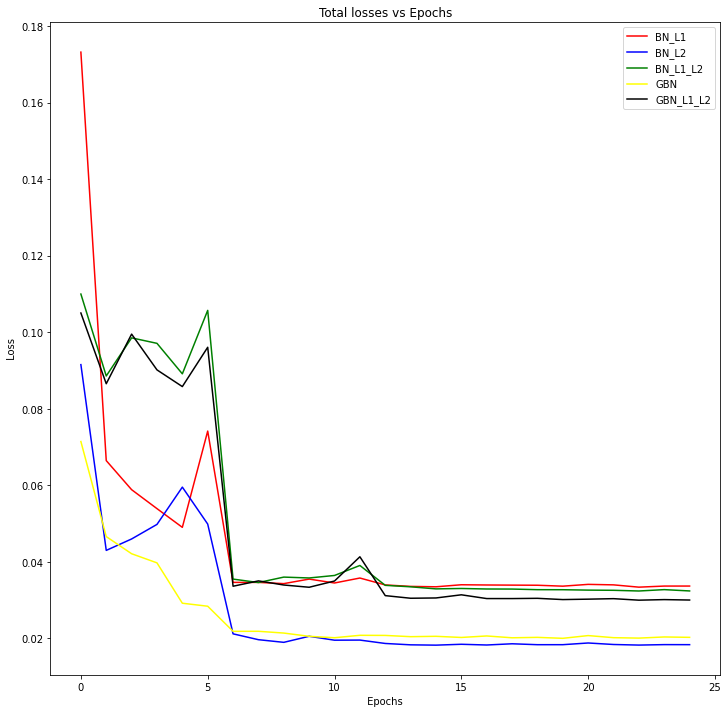

In [32]:
plot_acc_loss(metric_loss_values, "Loss")

In [33]:
metric_loss_values

[[0.17317945866584777,
  0.06646674939692021,
  0.05887230211496353,
  0.053920894801616666,
  0.049032054722309114,
  0.07418315305411816,
  0.034650285837054255,
  0.03464922255277634,
  0.03432880409359932,
  0.03551295937970281,
  0.0344936778485775,
  0.035789835166931155,
  0.0339851257994771,
  0.03360437500178814,
  0.0335000489205122,
  0.034032511377334596,
  0.0339719213321805,
  0.03393658046424389,
  0.033904287475347517,
  0.03366306426525116,
  0.03413347126245499,
  0.03400493732392788,
  0.03340598435997963,
  0.033689509463310244,
  0.03369429558962583],
 [0.09154039375782012,
  0.043009545838832854,
  0.045995634359121323,
  0.049800018221512435,
  0.05953879661560059,
  0.049886726623773574,
  0.021209168255329133,
  0.0196805787069723,
  0.01898882385343313,
  0.02056824082667008,
  0.019548681875132024,
  0.01957790339225903,
  0.01869492520391941,
  0.018337564581912012,
  0.018254929845035076,
  0.018483334930241107,
  0.018293676264584065,
  0.01861212974600494

In [34]:
metric_acc_values

[[95.77,
  98.71,
  98.97,
  99.06,
  99.02,
  98.22,
  99.36,
  99.36,
  99.35,
  99.29,
  99.35,
  99.37,
  99.42,
  99.38,
  99.39,
  99.41,
  99.44,
  99.44,
  99.44,
  99.45,
  99.44,
  99.4,
  99.4,
  99.41,
  99.39],
 [97.86,
  98.9,
  98.69,
  98.43,
  98.16,
  98.37,
  99.43,
  99.4,
  99.39,
  99.37,
  99.42,
  99.42,
  99.42,
  99.44,
  99.45,
  99.39,
  99.39,
  99.41,
  99.45,
  99.43,
  99.38,
  99.42,
  99.44,
  99.43,
  99.39],
 [97.85,
  97.92,
  97.71,
  97.75,
  98.23,
  97.66,
  99.26,
  99.3,
  99.29,
  99.25,
  99.27,
  99.19,
  99.32,
  99.38,
  99.34,
  99.37,
  99.34,
  99.3,
  99.36,
  99.34,
  99.3,
  99.34,
  99.35,
  99.34,
  99.36],
 [98.2,
  98.69,
  98.79,
  98.89,
  99.13,
  99.17,
  99.32,
  99.33,
  99.34,
  99.39,
  99.41,
  99.33,
  99.37,
  99.32,
  99.33,
  99.35,
  99.3,
  99.36,
  99.34,
  99.33,
  99.32,
  99.36,
  99.36,
  99.33,
  99.37],
 [97.79,
  98.15,
  97.73,
  97.87,
  98.36,
  97.62,
  99.33,
  99.33,
  99.33,
  99.28,
  99.35,
  99.1